## Logistic Regression

In [3]:
# import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import copy 
import math

%matplotlib inline

## 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.


In [4]:
# load dataset
x_train, y_train = load_data("data/ex2data1.txt")

In [6]:
print("First five elements in x_train are: ",x_train[:5])
print("Type of x_train: ", type(x_train))

First five elements in x_train are:  [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of x_train:  <class 'numpy.ndarray'>


In [7]:
print("First five elements in y_train are: ", y_train[:5])
print("Type of y_train: ", type(y_train))

First five elements in y_train are:  [0. 0. 0. 1. 1.]
Type of y_train:  <class 'numpy.ndarray'>


In [13]:
# checking the dimensions

print("The shape of x_train are: " + str(x_train.shape))
print("The shape of y_train are: " + str(y_train.shape))
print('we have m = %d training examples' % (len(y_train)))

The shape of x_train are: (100, 2)
The shape of y_train are: (100,)
we have m = 100 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- We use a helper function in the ``utils.py`` file to generate this plot. 


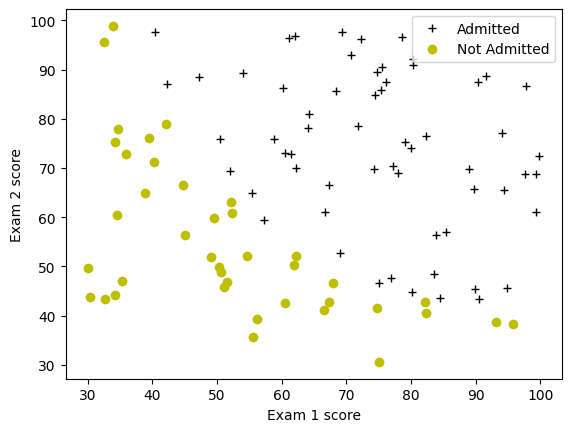

In [14]:
# Plot example

plot_data(x_train, y_train[:], pos_label = "Admitted", neg_label = "Not Admitted")

# Set the y-axis label
plt.ylabel("Exam 2 score")
# Set the x-axis label
plt.xlabel("Exam 1 score")
plt.legend(loc = "upper right")
plt.show()

### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.


In [15]:
def sigmoid(z):
    g = 1/ (1 + np.exp(-z))
    return g

In [17]:
value = 0
print(f"sigmoid({value}) = {sigmoid(value)}")
print(f"sigmoid([-1, 0, 1, 2]) = {sigmoid(np.array([-1, 0, 1, 2]))}")

sigmoid(0) = 0.5
sigmoid([-1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.


In [19]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_wb = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_wb)
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
    cost /= m
    
    return cost

In [22]:
m, n = x_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [24]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(x_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.218


### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

### Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.


In [25]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = sigmoid(np.dot(x[i],w) + b)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err*x[i][j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [28]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_dw, dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [30]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_dw, dj_db  = compute_gradient(x_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent. 
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [31]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m,n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        
        if i%math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w, b, J_history, w_history

In [32]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


### Plotting the decision boundary

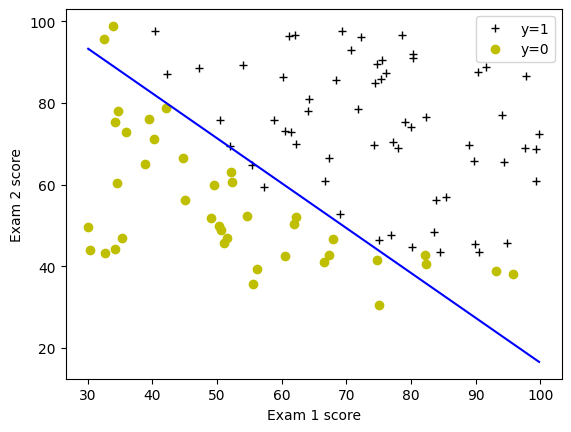

In [33]:
plot_decision_boundary(w, b, x_train, y_train)

plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")

plt.legend(loc = "upper right")
plt.show()

### 2.8 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

You will implement the `predict` function below to do this.


### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example 
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
   

In [37]:
def predict(x, w, b):
    m,n = x.shape
    p = np.zeros(m)
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)
        p[i] = f_wb_i>= 0.5
    
    return p

In [38]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


In [39]:
#Compute accuracy on our training set
p = predict(x_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


## 3 - Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. 

### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. 
- From these two tests, you would like to determine whether the microchips should be accepted or rejected. 
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 3.2 Loading and visualizing the data

Similar to previous parts of this exercise, let's start by loading the dataset for this task and visualizing it. 

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted 
      - `y_train = 0` if the microchip was rejected 
  - Both `X_train` and `y_train` are numpy arrays.

In [40]:
# load dataset
x_train, y_train = load_data("data/ex2data2.txt")

In [41]:
print("x_train: ", x_train[:5])
print("Type of x_train: ", type(x_train))

print("y_train: ", y_train[:5])
print("Type of y_train: ", type(y_train))

x_train:  [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of x_train:  <class 'numpy.ndarray'>
y_train:  [1. 1. 1. 1. 1.]
Type of y_train:  <class 'numpy.ndarray'>


In [43]:
# checking the dimension

print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


### visualizing our data

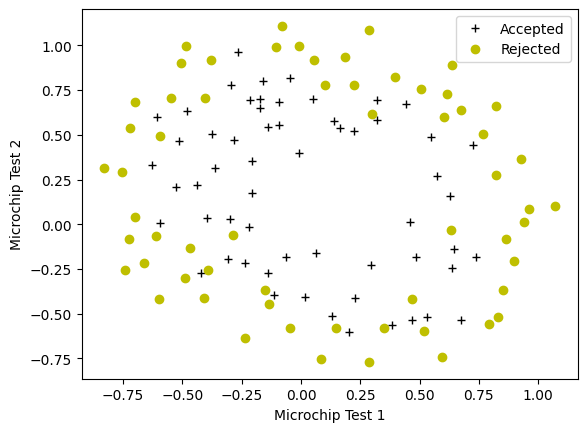

In [44]:
plot_data(x_train, y_train[:], pos_label = "Accepted", neg_label = "Rejected")
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc = "upper right")
plt.show()

### 3.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector. 

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot. 
- We have provided the `map_feature` function for you in utils.py. 

In [45]:
print("Original shape of data: ", x_train.shape)

mapped_x = map_feature(x_train[:, 0], x_train[:, 1])
print("Shape after feature mapping:", mapped_x.shape)

Original shape of data:  (118, 2)
Shape after feature mapping: (118, 27)


In [46]:
print("x_train[0]:", x_train[0])
print("mapped x_train[0]:", mapped_x[0])

x_train[0]: [0.051267 0.69956 ]
mapped x_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

### 3.4 Cost function for regularized logistic regression

In this part, you will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note that the $b$ parameter is not regularized.

### Exercise 5

Please complete the `compute_cost_reg` function below to calculate the following term for each element in $w$ 
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

The starter code then adds this to the cost without regularization (which you computed above in `compute_cost`) to calculate the cost with regulatization.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [51]:
def compute_cost_reg(x, y, w, b, lambda_):
    m,n = x.shape
    
    cost = compute_cost(x,y,w,b)
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (lambda_/(2*m))*(w[j]**2)
    
    total_cost = cost + reg_cost
    
    return total_cost

In [52]:
X_mapped = map_feature(x_train[:, 0], x_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)


Regularized cost : 0.6618252552483948


### 3.5 Gradient for regularized logistic regression

In this section, you will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$ 





### Exercise 6

Please complete the `compute_gradient_reg` function below to modify the code below to calculate the following term

$$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

The starter code will add this term to the $\frac{\partial J(\mathbf{w},b)}{\partial w}$ returned from `compute_gradient` above to get the gradient for the regularized cost function.


If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [53]:
def compute_gradient_reg(x, y, w, b, lambda_):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    m,n = x.shape
    
    for j in range(n):
        dj_dw[j] += (lambda_/m)*w[j]
    
    return dj_dw, dj_db

In [55]:
X_mapped = map_feature(x_train[:, 0], x_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_dw, dj_db = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.0031402782673134655]


### 3.6 Learning parameters using gradient descent

Similar to the previous parts, you will use your gradient descent function implemented above to learn the optimal parameters $w$,$b$. 
- If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters $w$. 
- After training our parameters, we will use it to plot the decision boundary. 

**Note**

The code block below takes quite a while to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, run for 100,000 iterations to see better results.

In [61]:
def gradient_descent_reg(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m,n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b, lambda_)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 100000:
            cost = cost_function(x, y, w, b, lambda_)
            J_history.append(cost)
        
        if i%math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w, b, J_history, w_history

In [62]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent_reg(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


### Plotting the Decision Boundary

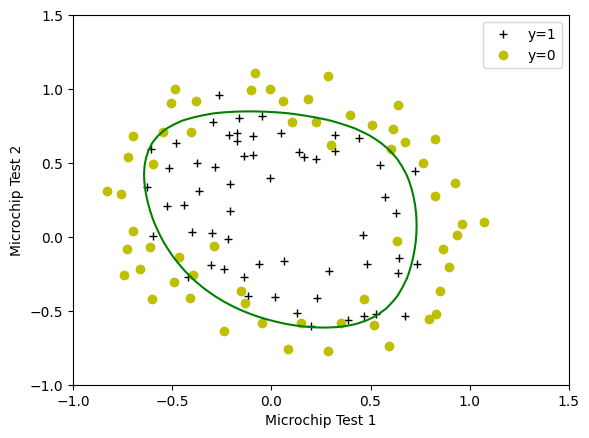

In [63]:
plot_decision_boundary(w, b, X_mapped, y_train)
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc = "upper right")
plt.show()

In [64]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
